## Lab 9 - Dense Neural Network
Name - Shubham Prajapati  

Student Id - 8945201

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## 1. Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with (2 points).

Training images shape: (60000, 28, 28)
Number of training samples: 60000
Test images shape: (10000, 28, 28)
Number of test samples: 10000


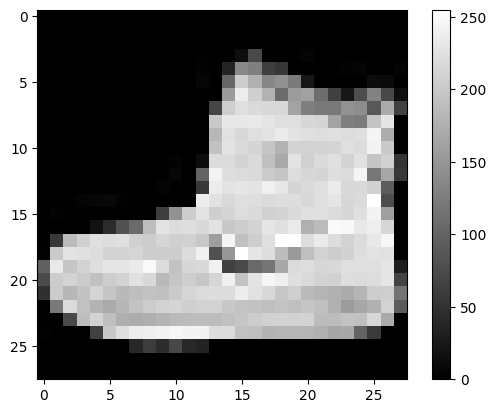

Example class labels: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


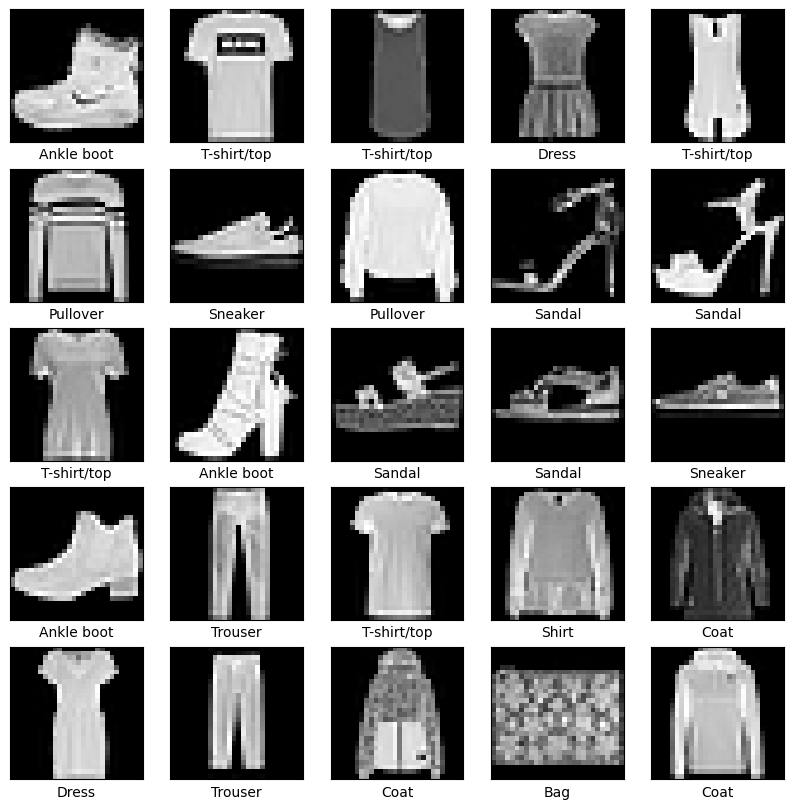

In [24]:
# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Exploring the dataset
print("Training images shape:", train_images.shape)
print("Number of training samples:", len(train_labels))
print("Test images shape:", test_images.shape)
print("Number of test samples:", len(test_labels))

# Showing a sample image from the dataset
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

# Displaying class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("Example class labels:", class_labels)

# Displaying a few sample images from different classes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_labels[train_labels[i]])
plt.show()


## 2.Train a dense neural network using Keras, try out at least three hyperparameters configurations 

In [25]:

# Preprocessing the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Defining the function to create and training a neural network
def create_and_train_model(hidden_units, activation, optimizer, epochs):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))  
    model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(10, activation='softmax'))  

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels,
                        epochs=epochs,
                        validation_split=0.2,
                        verbose=0)  

    return model, history


Configuration 1 - Test Accuracy: 0.8777999877929688
Configuration 2 - Test Accuracy: 0.8245999813079834
Configuration 3 - Test Accuracy: 0.8769999742507935


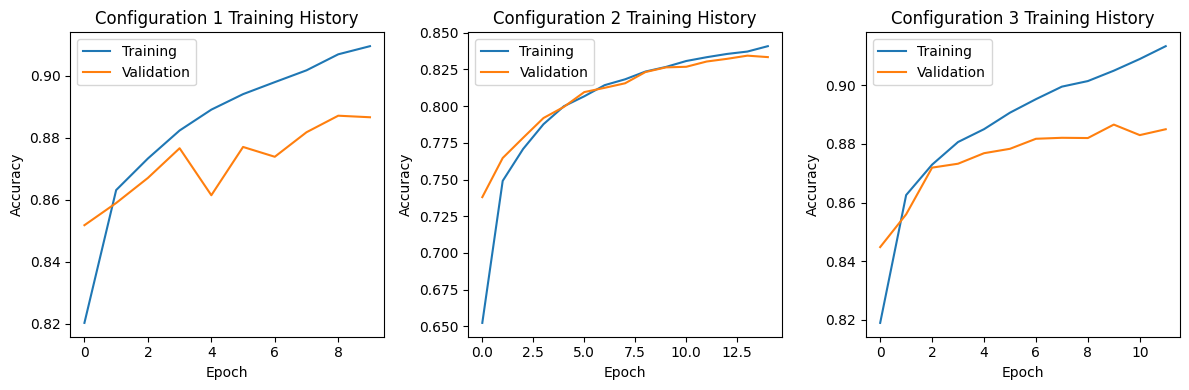

In [26]:
# trying out three hyperparameters configurations 
model1, history1 = create_and_train_model(hidden_units=128, activation='relu', optimizer='adam', epochs=10)
model2, history2 = create_and_train_model(hidden_units=256, activation='sigmoid', optimizer='sgd', epochs=15)
model3, history3 = create_and_train_model(hidden_units=64, activation='tanh', optimizer='adam', epochs=12)

# Evaluating the models on the test set
loss1, accuracy1 = model1.evaluate(test_images, test_labels, verbose=0)
loss2, accuracy2 = model2.evaluate(test_images, test_labels, verbose=0)
loss3, accuracy3 = model3.evaluate(test_images, test_labels, verbose=0)

# Printting the results
print("Configuration 1 - Test Accuracy:", accuracy1)
print("Configuration 2 - Test Accuracy:", accuracy2)
print("Configuration 3 - Test Accuracy:", accuracy3)

# Plot training history for each configuration
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.title('Configuration 1 Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.title('Configuration 2 Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history3.history['accuracy'], label='Training')
plt.plot(history3.history['val_accuracy'], label='Validation')
plt.title('Configuration 3 Training History')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## 3. Evaluate its accuracy for each of the configurations. Choose the best configuration, and: Report its accuracy, confusion metric, and specific examples of incorrect classification, and drew some conclusions from this exploration (2 points

In [27]:
def evaluate_model(model, test_images, test_labels):
    # Evaluating the model on the test set
    loss, accuracy = model.evaluate(test_images, test_labels, verbose=0)
    print("Test Accuracy:", accuracy)

    # Predicting the classes for the test set
    predictions = model.predict(test_images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(test_labels, axis=1)

    # Generating and displaying confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Displaying classification report
    print("Classification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=class_labels))

    # Displaying  specific examples of incorrect classification
    incorrect_indices = np.where(predicted_labels != true_labels)[0]
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(incorrect_indices[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(test_images[idx], cmap='gray')
        plt.title(f'True: {class_labels[true_labels[idx]]}\nPredicted: {class_labels[predicted_labels[idx]]}')
        plt.axis('off')
    plt.show()

    return accuracy

Test Accuracy: 0.8777999877929688
313/313 [==============================] - 0s 768us/step


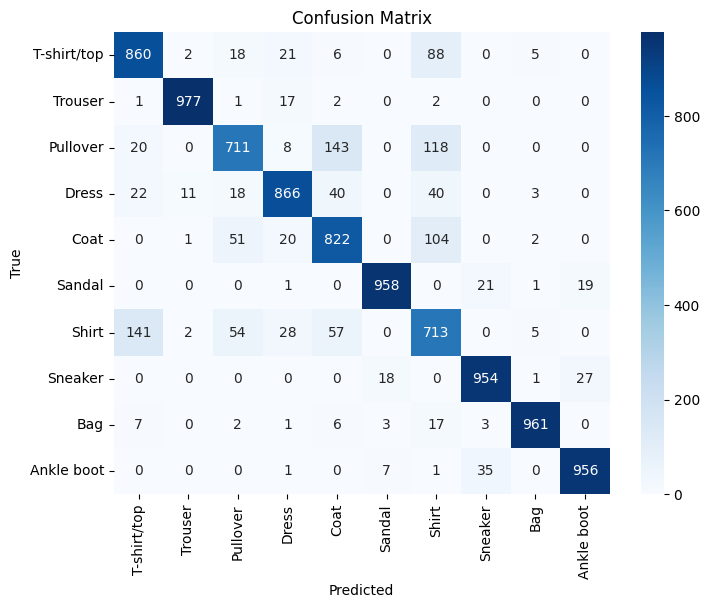

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.83      0.71      0.77      1000
       Dress       0.90      0.87      0.88      1000
        Coat       0.76      0.82      0.79      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.66      0.71      0.68      1000
     Sneaker       0.94      0.95      0.95      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



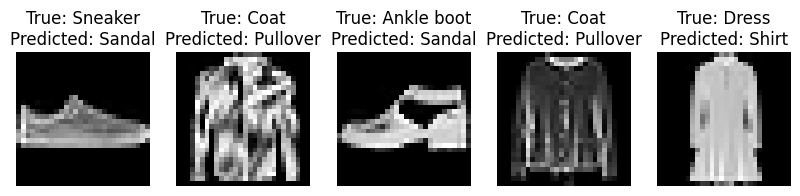

Test Accuracy: 0.8245999813079834
313/313 [==============================] - 0s 866us/step


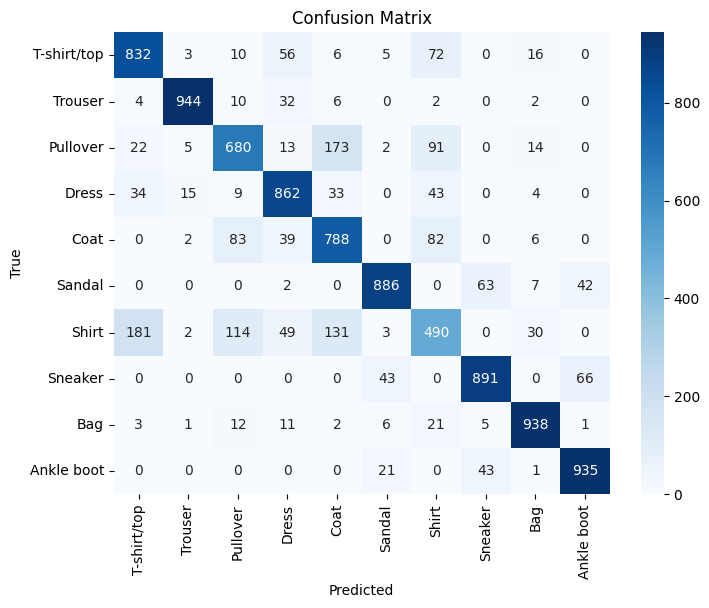

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.77      0.83      0.80      1000
     Trouser       0.97      0.94      0.96      1000
    Pullover       0.74      0.68      0.71      1000
       Dress       0.81      0.86      0.84      1000
        Coat       0.69      0.79      0.74      1000
      Sandal       0.92      0.89      0.90      1000
       Shirt       0.61      0.49      0.54      1000
     Sneaker       0.89      0.89      0.89      1000
         Bag       0.92      0.94      0.93      1000
  Ankle boot       0.90      0.94      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



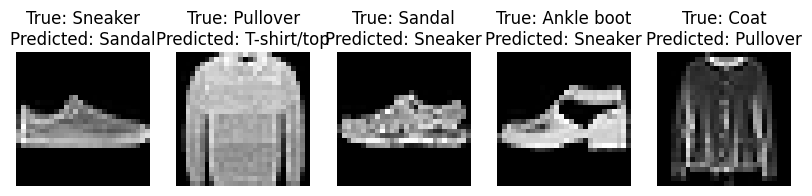

Test Accuracy: 0.8769999742507935
313/313 [==============================] - 0s 751us/step


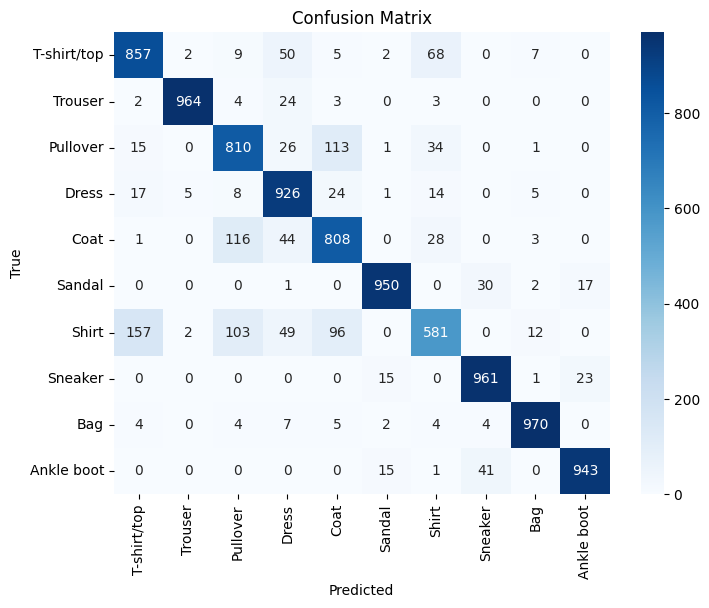

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.86      0.83      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.82      0.93      0.87      1000
        Coat       0.77      0.81      0.79      1000
      Sandal       0.96      0.95      0.96      1000
       Shirt       0.79      0.58      0.67      1000
     Sneaker       0.93      0.96      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



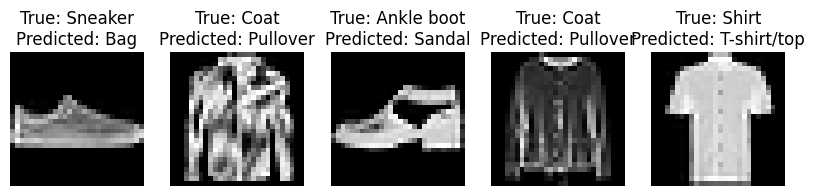

The best configuration is Configuration 1 with an accuracy of 0.8778


In [28]:
# Evaluating and report metrics for each model
accuracy1 = evaluate_model(model1, test_images, test_labels)
accuracy2 = evaluate_model(model2, test_images, test_labels)
accuracy3 = evaluate_model(model3, test_images, test_labels)

# Getting the best configuration based on accuracy
best_configuration = np.argmax([accuracy1, accuracy2, accuracy3]) + 1
print(f"The best configuration is Configuration {best_configuration} with an accuracy of {locals()[f'accuracy{best_configuration}']:.4f}")